#### Model spanish english 
    This model will be trained with the best combination of parameters found in the english-to-spanish  experiments done with 10 000 lines of data. Now it will be trained with 80 000 lines of data.
    This is the model we will be using for the User Interface API.

20906 11204 44 42
(64000, 44) (64000, 42) (16000, 44) (16000, 42)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 44, 128)           2675968   
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               198144    
_________________________________________________________________
repeat_vector (RepeatVector) (None, 42, 256)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 42, 256)           296448    
_________________________________________________________________
time_distributed (TimeDistri (None, 42, 11204)         2879428   
Total params: 6,049,988
Trainable params: 6,049,988
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
2000/2000 - 1515s - loss: 1.0

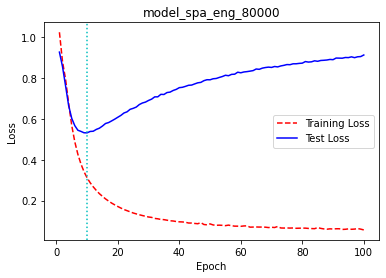

In [1]:
from fit_model import *
ds_filename, train_ds_fn, test_ds_fn = 'dataset/spanish-english-both-80000.txt', 'dataset/spanish-english-train-80000.txt','dataset/spanish-english-test-80000.txt'
units = 128
learning_rate = 0.001
loss_func='sparse_categorical_crossentropy'
epochs = 100
batch_size=32
model_save_file_name='Models/model_spa_eng_80000.h5'

def define_model_1(src_vocab, tar_vocab, src_timesteps, tar_timesteps, n_units):
	model = Sequential()
	model.add(Embedding(src_vocab, n_units, input_length=src_timesteps, mask_zero=True)) 
	model.add(Bidirectional(GRU(n_units)))
	model.add(RepeatVector(tar_timesteps))
	model.add(Bidirectional(GRU(n_units, return_sequences=True)))
	model.add(TimeDistributed(Dense(tar_vocab, activation='softmax')))
	return model

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model_history_save_file_name ='model_history/history_model_spa_eng_80000.npy'
model_spa_eng_80000 = define_model_1(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model_spa_eng_80000,loss_func,learning_rate)
plot_model(model_spa_eng_80000, to_file='model_images/model_spa_eng_80000_m.png', show_shapes=True)
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model_spa_eng_80000, model_save_file_name,model_history_save_file_name)
graph_loss_vs_epochs(model_spa_eng_80000.history, 'loss_vs_epochs_images/model_spa_eng_80000_le.png', 'model_spa_eng_80000')

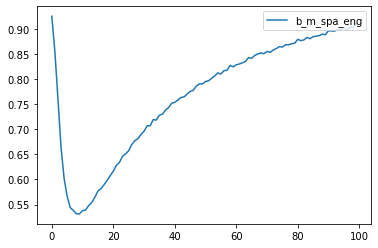

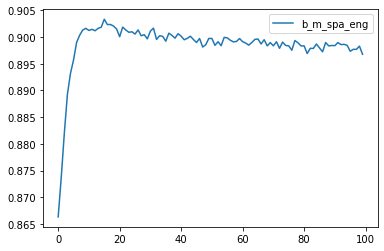

val loss:  0.5313314199447632
val accuracy:  0.9033347964286804


<Figure size 432x288 with 0 Axes>

In [6]:
loss_best_m_spa_eng=load_history('model_history/history_model_spa_eng_80000.npy')['val_loss']
accuracy_best_m_spa_eng=load_history('model_history/history_model_spa_eng_80000.npy')['val_acc']

x=range(100)
plt.plot(x,loss_best_m_spa_eng)

plt.legend(['b_m_spa_eng'], loc='upper right')
plt.show()
plt.savefig('loss_comparation/losses_best_m_spa_eng')

#accuracy
plt.plot(x,accuracy_best_m_spa_eng)

plt.legend(['b_m_spa_eng'], loc='upper right')
plt.show()
plt.savefig('accuracy_comparation/accuracy_best_m_spa_eng')

print("val loss: ",min(loss_best_m_spa_eng))
print("val accuracy: ",max(accuracy_best_m_spa_eng))

    As we can see, we got a minimum test loss of 0.53 and an accuracy of 90%, which we consider very good metrics.
    The total time it took to run 100 epochs was 2753 minutes (almost 46 hours), an approximate of 27 minutes and a half per epoch. This is because of the bidirectional layers that go forward and backward, consuming more time.